In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH_DRIVE = './All_3/DRIVE/training'

In [3]:
mask_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'1st_manual','*.jpg'))

In [4]:
i=21
for file in mask_DRIVE:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/DRIVE/training/1st_manual/'+str(i)+'_manual1.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/DRIVE/training/1st_manual/'+str(i)+'_manual1.jpg', img2)
    i+=1

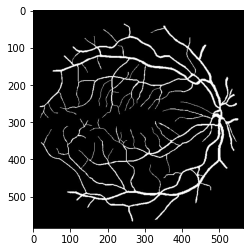

In [5]:
plt.imshow(img2)

In [6]:
img2.shape

(584, 565, 3)

In [7]:
images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))
mask_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'1st_manual','*.jpg'))
if not os.path.exists('./All_3/training/output_images'):
    os.makedirs('./All_3/training/output_images')
if not os.path.exists('./All_3/training/output_1st_manual'):
    os.makedirs('./All_3/training/output_1st_manual')
src = "./All_3/DRIVE/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/DRIVE/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [8]:
cropheight=200
cropwidth = 200
k=-1
for file in images_DRIVE:
    k+=1
    im = Image.open(images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/DRIVE/training\images\21_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\21_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\21_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\21_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\21_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\21_training.tif (200, 400, 400, 600)
./All_3/DRIVE/training\images\21_training.tif (400, 0, 600, 200)
./All_3/DRIVE/training\images\21_training.tif (400, 200, 600, 400)
./All_3/DRIVE/training\images\21_training.tif (400, 400, 600, 600)
./All_3/DRIVE/training\images\22_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\22_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\22_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\22_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\22_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\22_training.tif (200, 400, 400, 600)
./All_3/DRIVE/tra

./All_3/DRIVE/training\images\38_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\38_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\38_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\38_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\38_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\38_training.tif (200, 400, 400, 600)
./All_3/DRIVE/training\images\38_training.tif (400, 0, 600, 200)
./All_3/DRIVE/training\images\38_training.tif (400, 200, 600, 400)
./All_3/DRIVE/training\images\38_training.tif (400, 400, 600, 600)
./All_3/DRIVE/training\images\39_training.tif (0, 0, 200, 200)
./All_3/DRIVE/training\images\39_training.tif (0, 200, 200, 400)
./All_3/DRIVE/training\images\39_training.tif (0, 400, 200, 600)
./All_3/DRIVE/training\images\39_training.tif (200, 0, 400, 200)
./All_3/DRIVE/training\images\39_training.tif (200, 200, 400, 400)
./All_3/DRIVE/training\images\39_training.tif (200, 400, 400, 600)
./All_3/DRIVE/tra

In [9]:
cropheight=200
cropwidth = 200
k=-1
for file in mask_DRIVE:
    k+=1
    im = Image.open(mask_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_DRIVE[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/DRIVE/training\1st_manual\21_manual1.jpg (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (400, 200, 600, 400)
./All_3/DRIVE/training\1st_manual\21_manual1.jpg (400, 400, 600, 600)
./All_3/DRIVE/training\1st_manual\22_manual1.jpg (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\22_manual1.jpg (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\22_manual1.jpg (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\22_manual1.jpg (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\22_manual1.jpg (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\22_manua

./All_3/DRIVE/training\1st_manual\38_manual1.jpg (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (400, 200, 600, 400)
./All_3/DRIVE/training\1st_manual\38_manual1.jpg (400, 400, 600, 600)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (0, 0, 200, 200)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (0, 200, 200, 400)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (0, 400, 200, 600)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (200, 0, 400, 200)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (200, 200, 400, 400)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (200, 400, 400, 600)
./All_3/DRIVE/training\1st_manual\39_manual1.jpg (400, 0, 600, 200)
./All_3/DRIVE/training\1st_manual\39_m

In [10]:
PATH_ChaseDB = './ALL_3/ChaseDB/training/manual'
mask_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'L','*.png'))

In [11]:
i=1
for file in mask_ChaseDB:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/ChaseDB/training/manual/L/Image_'+str(i)+'L_1stHO.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/ChaseDB/training/1st_manual/Image_'+str(i)+'L_1stHO.png', img2)
    i+=1

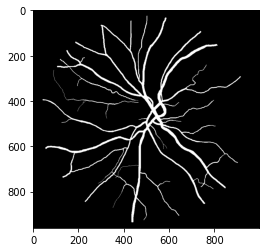

In [12]:
plt.imshow(img2)

In [13]:
img2.shape

(960, 999, 3)

In [14]:
PATH_ChaseDB = './ALL_3/ChaseDB/training/manual'
mask_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'R','*.png'))

In [15]:
i=1
for file in mask_ChaseDB:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/ChaseDB/training/manual/R/Image_'+str(i)+'R_1stHO.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/ChaseDB/training/1st_manual/Image_'+str(i)+'R_1stHO.png', img2)
    i+=1

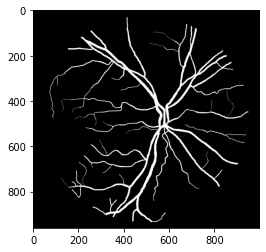

In [16]:
plt.imshow(img2)

In [17]:
img2.shape

(960, 999, 3)

In [18]:
PATH_ChaseDB = './All_3/ChaseDB/training'

In [19]:
images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.jpg'))
mask_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'1st_manual','*.png'))
src = "./All_3/ChaseDB/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/ChaseDB/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [20]:
cropheight=350
cropwidth = 350
k=-1
for file in images_ChaseDB:
    k+=1
    im = Image.open(images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/ChaseDB/training\images\Image_01L.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (350, 700, 700, 1050)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 0, 1050, 350)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 350, 1050, 700)
./All_3/ChaseDB/training\images\Image_01L.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_01R.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_01R.jpg (350, 700, 700, 1050)
./All_3/C

./All_3/ChaseDB/training\images\Image_09L.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_09R.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_09R.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_09R.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_09R.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_09R.jpg (350, 350, 700, 700)
./All_3/ChaseDB/training\images\Image_09R.jpg (350, 700, 700, 1050)
./All_3/ChaseDB/training\images\Image_09R.jpg (700, 0, 1050, 350)
./All_3/ChaseDB/training\images\Image_09R.jpg (700, 350, 1050, 700)
./All_3/ChaseDB/training\images\Image_09R.jpg (700, 700, 1050, 1050)
./All_3/ChaseDB/training\images\Image_10L.jpg (0, 0, 350, 350)
./All_3/ChaseDB/training\images\Image_10L.jpg (0, 350, 350, 700)
./All_3/ChaseDB/training\images\Image_10L.jpg (0, 700, 350, 1050)
./All_3/ChaseDB/training\images\Image_10L.jpg (350, 0, 700, 350)
./All_3/ChaseDB/training\images\Image_10L.jpg (350, 350, 700, 700)
./All_3/

In [21]:
cropheight=350
cropwidth = 350
k=-1
for file in mask_ChaseDB:
    k+=1
    im = Image.open(mask_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (350, 700, 700, 1050)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (700, 0, 1050, 350)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (700, 350, 1050, 700)
./All_3/ChaseDB/training\1st_manual\Image_10L_1stHO.png (700, 700, 1050, 1050)
./All_3/ChaseDB/training\1st_manual\Image_10R_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_10R_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_10R_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_10R_1stHO.png (350, 0, 700, 350)
./All_3/ChaseD

./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (350, 700, 700, 1050)
./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (700, 0, 1050, 350)
./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (700, 350, 1050, 700)
./All_3/ChaseDB/training\1st_manual\Image_3L_1stHO.png (700, 700, 1050, 1050)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (0, 0, 350, 350)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (0, 350, 350, 700)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (0, 700, 350, 1050)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (350, 0, 700, 350)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (350, 350, 700, 700)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (350, 700, 700, 1050)
./All_3/ChaseDB/training\1st_manual\Image_3R_1stHO.png (700, 0, 1050, 350)
./All_3/ChaseDB/trai

./All_3/ChaseDB/training\1st_manual\Image_9R_1stHO.png (700, 700, 1050, 1050)


In [22]:
PATH_HRF = './ALL_3/HRF/training/manual'
mask_HRF=glob.glob(os.path.join(PATH_HRF,'dr','*.jpg'))

In [23]:
i=1
for file in mask_HRF:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/HRF/training/manual/dr/'+str(i)+'_dr.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/HRF/training/1st_manual/'+str(i)+'_dr.jpg', img2)
    i+=1

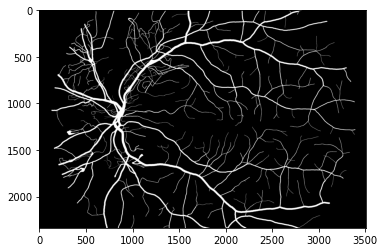

In [24]:
plt.imshow(img2)

In [25]:
img2.shape

(2336, 3504, 3)

In [26]:
PATH_HRF = './ALL_3/HRF/training/manual'
mask_HRF=glob.glob(os.path.join(PATH_HRF,'g','*.jpg'))

In [27]:
i=1
for file in mask_HRF:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/HRF/training/manual/g/'+str(i)+'_g.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/HRF/training/1st_manual/'+str(i)+'_g.jpg', img2)
    i+=1

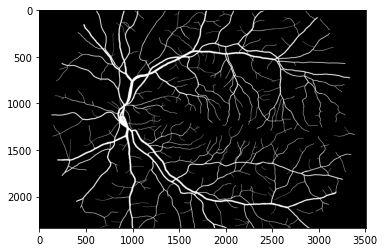

In [28]:
plt.imshow(img2)

In [29]:
img2.shape

(2336, 3504, 3)

In [30]:
PATH_HRF = './ALL_3/HRF/training/manual'
mask_HRF=glob.glob(os.path.join(PATH_HRF,'h','*.jpg'))

In [31]:
i=1
for file in mask_HRF:
    img = cv2.imread('C:/Users/subah/fcn/ALL_3/HRF/training/manual/h/'+str(i)+'_h.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/ALL_3/HRF/training/1st_manual/'+str(i)+'_h.jpg', img2)
    i+=1

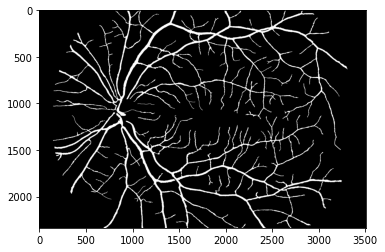

In [32]:
plt.imshow(img2)

In [33]:
img2.shape

(2336, 3504, 3)

In [34]:
PATH_HRF = './All_3/HRF/training'

In [35]:
images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.jpg'))
mask_HRF=glob.glob(os.path.join(PATH_HRF,'1st_manual','*.jpg'))
src = "./All_3/HRF/training/images/"
dst = "./All_3/training/output_images/"
src1= "./All_3/HRF/training/1st_manual/"
dst1 = "./All_3/training/output_1st_manual/"

In [36]:
cropheight=900
cropwidth = 600
k=-1
for file in images_HRF:
    k+=1
    im = Image.open(images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_3/HRF/training\images\01_dr.JPG (0, 0, 600, 900)
./All_3/HRF/training\images\01_dr.JPG (0, 900, 600, 1800)
./All_3/HRF/training\images\01_dr.JPG (0, 1800, 600, 2700)
./All_3/HRF/training\images\01_dr.JPG (600, 0, 1200, 900)
./All_3/HRF/training\images\01_dr.JPG (600, 900, 1200, 1800)
./All_3/HRF/training\images\01_dr.JPG (600, 1800, 1200, 2700)
./All_3/HRF/training\images\01_dr.JPG (1200, 0, 1800, 900)
./All_3/HRF/training\images\01_dr.JPG (1200, 900, 1800, 1800)
./All_3/HRF/training\images\01_dr.JPG (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\01_dr.JPG (1800, 0, 2400, 900)
./All_3/HRF/training\images\01_dr.JPG (1800, 900, 2400, 1800)
./All_3/HRF/training\images\01_dr.JPG (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\01_dr.JPG (2400, 0, 3000, 900)
./All_3/HRF/training\images\01_dr.JPG (2400, 900, 3000, 1800)
./All_3/HRF/training\images\01_dr.JPG (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\01_dr.JPG (3000, 0, 3600, 900)
./All_3/HRF/training\images\01_dr.JP

./All_3/HRF/training\images\03_g.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\03_g.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\03_g.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\03_h.jpg (0, 0, 600, 900)
./All_3/HRF/training\images\03_h.jpg (0, 900, 600, 1800)
./All_3/HRF/training\images\03_h.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\03_h.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\03_h.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\03_h.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\03_h.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\03_h.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\03_h.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\03_h.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\03_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\03_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\03_h.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\images\03_h.jpg (2400, 900, 300

./All_3/HRF/training\images\06_g.jpg (0, 900, 600, 1800)
./All_3/HRF/training\images\06_g.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\06_g.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\06_g.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\06_g.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\06_g.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\06_g.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\06_g.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\06_g.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\06_g.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\06_g.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\06_g.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\images\06_g.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\images\06_g.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\06_g.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\06_g.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\06_g.jpg (3000, 1

./All_3/HRF/training\images\09_dr.JPG (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\09_g.jpg (0, 0, 600, 900)
./All_3/HRF/training\images\09_g.jpg (0, 900, 600, 1800)
./All_3/HRF/training\images\09_g.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\09_g.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\09_g.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\09_g.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\09_g.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\09_g.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\09_g.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\09_g.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\09_g.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\09_g.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\09_g.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\images\09_g.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\images\09_g.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\09_g.jpg (3000, 0, 

./All_3/HRF/training\images\11_h.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\12_dr.JPG (0, 0, 600, 900)
./All_3/HRF/training\images\12_dr.JPG (0, 900, 600, 1800)
./All_3/HRF/training\images\12_dr.JPG (0, 1800, 600, 2700)
./All_3/HRF/training\images\12_dr.JPG (600, 0, 1200, 900)
./All_3/HRF/training\images\12_dr.JPG (600, 900, 1200, 1800)
./All_3/HRF/training\images\12_dr.JPG (600, 1800, 1200, 2700)
./All_3/HRF/training\images\12_dr.JPG (1200, 0, 1800, 900)
./All_3/HRF/training\images\12_dr.JPG (1200, 900, 1800, 1800)
./All_3/HRF/training\images\12_dr.JPG (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\12_dr.JPG (1800, 0, 2400, 900)
./All_3/HRF/training\images\12_dr.JPG (1800, 900, 2400, 1800)
./All_3/HRF/training\images\12_dr.JPG (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\12_dr.JPG (2400, 0, 3000, 900)
./All_3/HRF/training\images\12_dr.JPG (2400, 900, 3000, 1800)
./All_3/HRF/training\images\12_dr.JPG (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\12_dr

./All_3/HRF/training\images\14_g.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\images\14_g.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\images\14_g.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\images\14_g.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\images\14_h.jpg (0, 0, 600, 900)
./All_3/HRF/training\images\14_h.jpg (0, 900, 600, 1800)
./All_3/HRF/training\images\14_h.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\images\14_h.jpg (600, 0, 1200, 900)
./All_3/HRF/training\images\14_h.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\images\14_h.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\images\14_h.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\images\14_h.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\images\14_h.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\images\14_h.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\images\14_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\images\14_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\images\14_h.jpg (2400, 0, 3

In [37]:
cropheight=900
cropwidth = 600
k=-1
for file in mask_HRF:
    k+=1
    im = Image.open(mask_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_HRF[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_3/HRF/training\1st_manual\10_dr.jpg (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\10_dr.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\10_dr.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\10_dr.jpg (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\10_dr.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\10_dr.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\10_dr.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\10_dr.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\10_dr.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\10_dr.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\10_dr.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\10_dr.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\10_dr.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\10_dr.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\10_dr.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\10_

./All_3/HRF/training\1st_manual\12_g.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\12_g.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\12_g.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\12_h.jpg (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\12_h.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\12_h.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\12_h.jpg (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\12_h.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\12_h.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\12_h.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\12_h.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\12_h.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\12_h.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\12_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\12_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\12_h.jpg (2400, 0,

./All_3/HRF/training\1st_manual\1_dr.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\1_dr.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\1_dr.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\1_dr.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\1_dr.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\1_dr.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\1_dr.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\1_dr.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\1_dr.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\1_dr.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\1_dr.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\1_dr.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\1_dr.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\1_g.jpg (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\1_g.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\1_g.jpg (0, 18

./All_3/HRF/training\1st_manual\3_h.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\3_h.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\3_h.jpg (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\3_h.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\3_h.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\3_h.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\3_h.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\3_h.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\3_h.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\3_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\3_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\3_h.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\3_h.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\3_h.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\3_h.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\3_h.jpg (3000, 900, 3600, 180

./All_3/HRF/training\1st_manual\6_dr.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\6_dr.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\6_g.jpg (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\6_g.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\6_g.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\6_g.jpg (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\6_g.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\6_g.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\6_g.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\6_g.jpg (1200, 900, 1800, 1800)
./All_3/HRF/training\1st_manual\6_g.jpg (1200, 1800, 1800, 2700)
./All_3/HRF/training\1st_manual\6_g.jpg (1800, 0, 2400, 900)
./All_3/HRF/training\1st_manual\6_g.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\6_g.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\6_g.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\6_g.jpg (2400, 900, 3000, 1800)

./All_3/HRF/training\1st_manual\8_h.jpg (1800, 900, 2400, 1800)
./All_3/HRF/training\1st_manual\8_h.jpg (1800, 1800, 2400, 2700)
./All_3/HRF/training\1st_manual\8_h.jpg (2400, 0, 3000, 900)
./All_3/HRF/training\1st_manual\8_h.jpg (2400, 900, 3000, 1800)
./All_3/HRF/training\1st_manual\8_h.jpg (2400, 1800, 3000, 2700)
./All_3/HRF/training\1st_manual\8_h.jpg (3000, 0, 3600, 900)
./All_3/HRF/training\1st_manual\8_h.jpg (3000, 900, 3600, 1800)
./All_3/HRF/training\1st_manual\8_h.jpg (3000, 1800, 3600, 2700)
./All_3/HRF/training\1st_manual\9_dr.jpg (0, 0, 600, 900)
./All_3/HRF/training\1st_manual\9_dr.jpg (0, 900, 600, 1800)
./All_3/HRF/training\1st_manual\9_dr.jpg (0, 1800, 600, 2700)
./All_3/HRF/training\1st_manual\9_dr.jpg (600, 0, 1200, 900)
./All_3/HRF/training\1st_manual\9_dr.jpg (600, 900, 1200, 1800)
./All_3/HRF/training\1st_manual\9_dr.jpg (600, 1800, 1200, 2700)
./All_3/HRF/training\1st_manual\9_dr.jpg (1200, 0, 1800, 900)
./All_3/HRF/training\1st_manual\9_dr.jpg (1200, 900, 1800,

In [38]:
PATH1 = 'All_3//training'

In [39]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.tif'))

In [40]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [41]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [42]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(1170, 128, 128, 3)

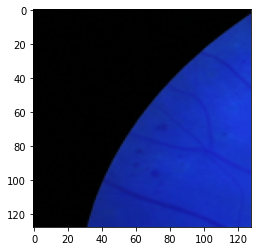

In [43]:
plt.imshow(orig_images[0])

In [44]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape

(1170, 128, 128, 3)

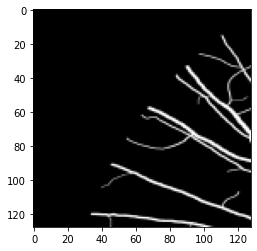

In [45]:
plt.imshow(masks[0])

In [46]:
masks.shape, orig_images.shape

((1170, 128, 128, 3), (1170, 128, 128, 3))

In [47]:
orig_images = orig_images / 255
masks = masks / 255

In [48]:
VGG_Weights_path = "C:/Users/subah/fcn/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"


In [49]:
n_classes=3

In [50]:
def FCN8( nClasses ,  input_height=128, input_width=128):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 512,512,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 512, 512, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = n_classes,  
             input_height = 128, 
             input_width  = 128)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [51]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(orig_images, masks, epochs = 50, batch_size= 16 , shuffle = True, validation_split = 0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1053 samples, validate on 117 samples
Epoch 1/50
1053/1053 [==============================] - 580s 551ms/step - loss: 0.4530 - accuracy: 0.8328 - val_loss: 0.4486 - val_accuracy: 0.9034
Epoch 2/50
1053/1053 [==============================] - 550s 522ms/step - loss: 0.4520 - accuracy: 0.8349 - val_loss: 0.4486 - val_accuracy: 0.9034
Epoch 3/50
1053/1053 [==============================] - 555s 527ms/step - loss: 0.4520 - accuracy: 0.8349 - val_loss: 0.4486 - val_accuracy: 0.9034
Epoch 4/50
1053/1053 [==============================] - 519s 493ms/step - loss: 0.4520 - accuracy: 0.8349 - val_loss: 0.4486 - val_accuracy: 0.9034
Epoch 5/50
1053/1053 [==============================] - 513s 487ms/step - loss: 0.4520 - accuracy: 0.8349 - val_loss: 0.4486 - val_accuracy: 0.9034
Epoch 6/50
1053/1053 [==============================] - 511s 485ms/step - loss: 0.4520 - accuracy: 0.8349 - val_loss: 0

In [52]:
PATH_DRIVE= 'All_3//DRIVE//test'

In [53]:
t_images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))

In [54]:
if not os.path.exists('.All_3/test/output_images'):
    os.makedirs('./All_3/test/output_images')
src = "./All_3/DRIVE/test/images/"
dst = "./All_3/test/output_images/"

In [55]:
cropheight=200
cropwidth = 200
k=-1
for file in t_images_DRIVE:
    k+=1
    im = Image.open(t_images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//DRIVE//test\images\01_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\01_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\01_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\01_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\01_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\01_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\01_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\01_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\01_test.tif (400, 400, 600, 600)
All_3//DRIVE//test\images\02_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\02_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\02_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\02_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\02_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\02_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\02_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\02_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\im

All_3//DRIVE//test\images\19_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\19_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\19_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\19_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\19_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\19_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\19_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\19_test.tif (400, 400, 600, 600)
All_3//DRIVE//test\images\20_test.tif (0, 0, 200, 200)
All_3//DRIVE//test\images\20_test.tif (0, 200, 200, 400)
All_3//DRIVE//test\images\20_test.tif (0, 400, 200, 600)
All_3//DRIVE//test\images\20_test.tif (200, 0, 400, 200)
All_3//DRIVE//test\images\20_test.tif (200, 200, 400, 400)
All_3//DRIVE//test\images\20_test.tif (200, 400, 400, 600)
All_3//DRIVE//test\images\20_test.tif (400, 0, 600, 200)
All_3//DRIVE//test\images\20_test.tif (400, 200, 600, 400)
All_3//DRIVE//test\images\20_test.tif (400, 400, 600, 600)


In [56]:
PATH_ChaseDB= 'All_3//ChaseDB//test'

In [57]:
t_images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.JPG'))

In [58]:
src = "./All_3/ChaseDB/test/images/"
dst = "./All_3/test/output_images/"

In [59]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images_ChaseDB:
    k+=1
    im = Image.open(t_images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//ChaseDB//test\images\Image_14L.jpg (0, 0, 350, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (0, 350, 350, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (0, 700, 350, 1050)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 0, 700, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 350, 700, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (350, 700, 700, 1050)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 0, 1050, 350)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 350, 1050, 700)
All_3//ChaseDB//test\images\Image_14L.jpg (700, 700, 1050, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 0, 350, 350)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 350, 350, 700)
All_3//ChaseDB//test\images\Image_14R.jpg (0, 700, 350, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 0, 700, 350)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 350, 700, 700)
All_3//ChaseDB//test\images\Image_14R.jpg (350, 700, 700, 1050)
All_3//ChaseDB//test\images\Image_14R.jpg (700, 0, 1050, 350)
All_3//

In [60]:
PATH_HRF= 'All_3//HRF//test'

In [61]:
t_images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.jpg'))

In [62]:
src = "./All_3/HRF/test/images/"
dst = "./All_3/test/output_images/"

In [63]:
cropheight=900
cropwidth = 600
k=-1
for file in t_images_HRF:
    k+=1
    im = Image.open(t_images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_3//HRF//test\images\15_dr.JPG (0, 0, 600, 900)
All_3//HRF//test\images\15_dr.JPG (0, 900, 600, 1800)
All_3//HRF//test\images\15_dr.JPG (0, 1800, 600, 2700)
All_3//HRF//test\images\15_dr.JPG (600, 0, 1200, 900)
All_3//HRF//test\images\15_dr.JPG (600, 900, 1200, 1800)
All_3//HRF//test\images\15_dr.JPG (600, 1800, 1200, 2700)
All_3//HRF//test\images\15_dr.JPG (1200, 0, 1800, 900)
All_3//HRF//test\images\15_dr.JPG (1200, 900, 1800, 1800)
All_3//HRF//test\images\15_dr.JPG (1200, 1800, 1800, 2700)
All_3//HRF//test\images\15_dr.JPG (1800, 0, 2400, 900)
All_3//HRF//test\images\15_dr.JPG (1800, 900, 2400, 1800)
All_3//HRF//test\images\15_dr.JPG (1800, 1800, 2400, 2700)
All_3//HRF//test\images\15_dr.JPG (2400, 0, 3000, 900)
All_3//HRF//test\images\15_dr.JPG (2400, 900, 3000, 1800)
All_3//HRF//test\images\15_dr.JPG (2400, 1800, 3000, 2700)
All_3//HRF//test\images\15_dr.JPG (3000, 0, 3600, 900)
All_3//HRF//test\images\15_dr.JPG (3000, 900, 3600, 1800)
All_3//HRF//test\images\15_dr.JPG (3000, 1

In [64]:
PATH2 = 'All_3//test'

In [65]:
t_images=glob.glob(os.path.join(PATH2,'output_images','*.tiff'))

In [66]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(252, 128, 128, 3)

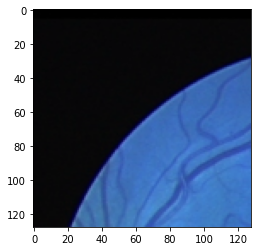

In [67]:
plt.imshow(test_images[0])

In [68]:
test_images.shape

(252, 128, 128, 3)

In [69]:
test_images = test_images / 255

In [70]:
imgs_mask_test = model.predict(test_images, verbose=1)

252/252 [==============================] - 15s 58ms/step


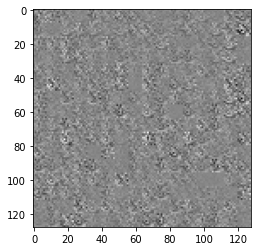

In [71]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [72]:
yp = np.round(imgs_mask_test,0)

In [73]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

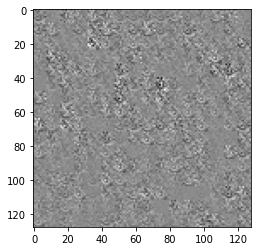

In [74]:
plt.imshow(i, cmap='gray')


##### 